<a href="https://colab.research.google.com/github/mifta195/Queue/blob/main/Final_Project_Kelompok_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Group Project - CO2 Emission by Vehicles**

**Kelompok 3:**
*   Diah Dwi Cahyanti
*   Wahyu Dewi Fitriyanti
*   Miftahul Jannah
*   Mahardika

**Deskripsi Dataset**

Dataset diperoleh dari Kaggle tentang CO2 Emission by Vehicles : https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Dataset ini berisi informasi mengenai emisi CO2 dari berbagai macam kendaraan dengan fitur berbeda.
Terdiri dari 12 kolom dengan detail sebagai berikut:

1. Make : Perusahaan yang membuat kendaraan
2. Model : Model dari kendaraan
3. Vehicle Class : Kelas dari kendaraan berdasarkan utilitas, kapasitas dan berat
4. Engine Size (L) : Ukuran dari mesin dalam satuan liter (L)
5. Cylinders : Jumlah silinder kendaraan (ruang naiknya piston)
6. Transmission : Tipe transmisi beserta jumlah gigi (gears) yang dimilikinya
- A = Otomatis
- AM = Manual Otomatis
- AS = Otomatis dengan pilihan shift
- AV = Variabel kontinu
- M = Manual
- Angka yang menyertai = Jumlah gigi (gears)
7. Fuel Type : Tipe bahan bakar
- X = Bensin Reguler
- Z = Bensin Premium
- D = Disel
- E = Ethanol (E85)
- N = Gas Natural
8. Fuel Consumption City (L/100 km) : Jumlah konsumsi bahan bakar di jalan perkotaan dalam satuan (L/100 km)
9. Fuel Consumption Hwy (L/100 km) : Jumlah konsumsi bahan bakar di jalan tol/jalan raya dalam satuan (L/100 km)
10. Fuel Consumption Comb (L/100 km) : Jumlah konsumsi bahan bakar gabungan (55% jalan perkotaaan & 45% jalan tol/jalan raya) dalam satuan (L/100 km)
11. Fuel Consumption Comb (mpg): Jumlah konsumsi bahan bakar gabungan (55% jalan perkotaaan & 45% jalan tol/jalan raya) dalam satuan mil per galon (mpg)
12. CO2 Emissions(g/km) : Emisi knalpot karbon dioksida dalam gram/kilometer (g/km) dari gabungan berkendara pada jalan perkotaan dan jalan tol/jalan raya

In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'CO2 Emissions_Canada.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
# Checking for missing values and examining data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values, data_types

(Make                                0
 Model                               0
 Vehicle Class                       0
 Engine Size(L)                      0
 Cylinders                           0
 Transmission                        0
 Fuel Type                           0
 Fuel Consumption City (L/100 km)    0
 Fuel Consumption Hwy (L/100 km)     0
 Fuel Consumption Comb (L/100 km)    0
 Fuel Consumption Comb (mpg)         0
 CO2 Emissions(g/km)                 0
 dtype: int64,
 Make                                 object
 Model                                object
 Vehicle Class                        object
 Engine Size(L)                      float64
 Cylinders                             int64
 Transmission                         object
 Fuel Type                            object
 Fuel Consumption City (L/100 km)    float64
 Fuel Consumption Hwy (L/100 km)     float64
 Fuel Consumption Comb (L/100 km)    float64
 Fuel Consumption Comb (mpg)           int64
 CO2 Emissions(g/km)  

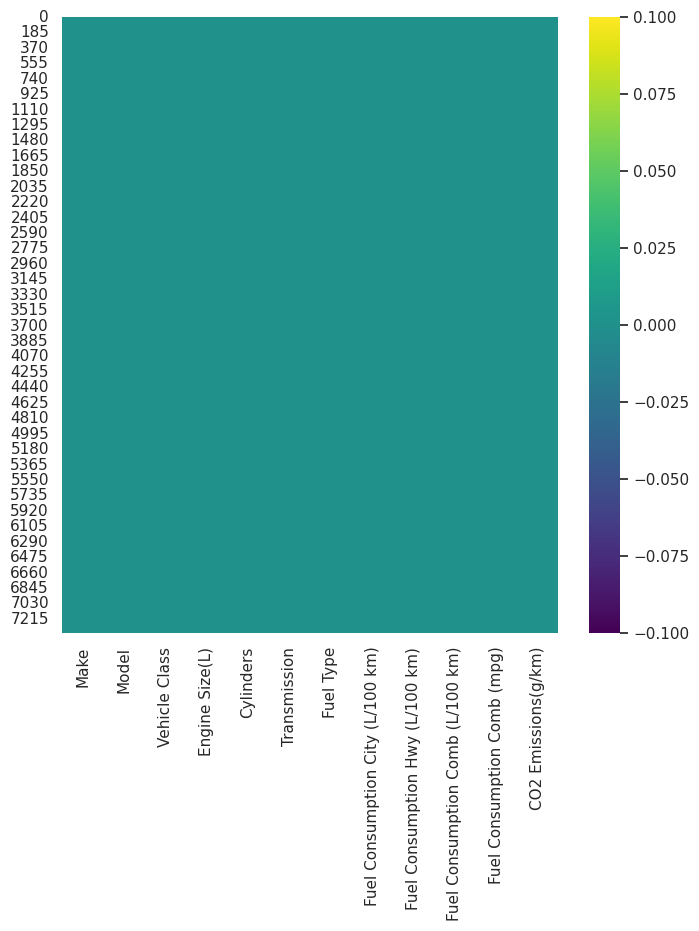

In [ ]:
# visualisasi missing values
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull(), cmap='viridis');

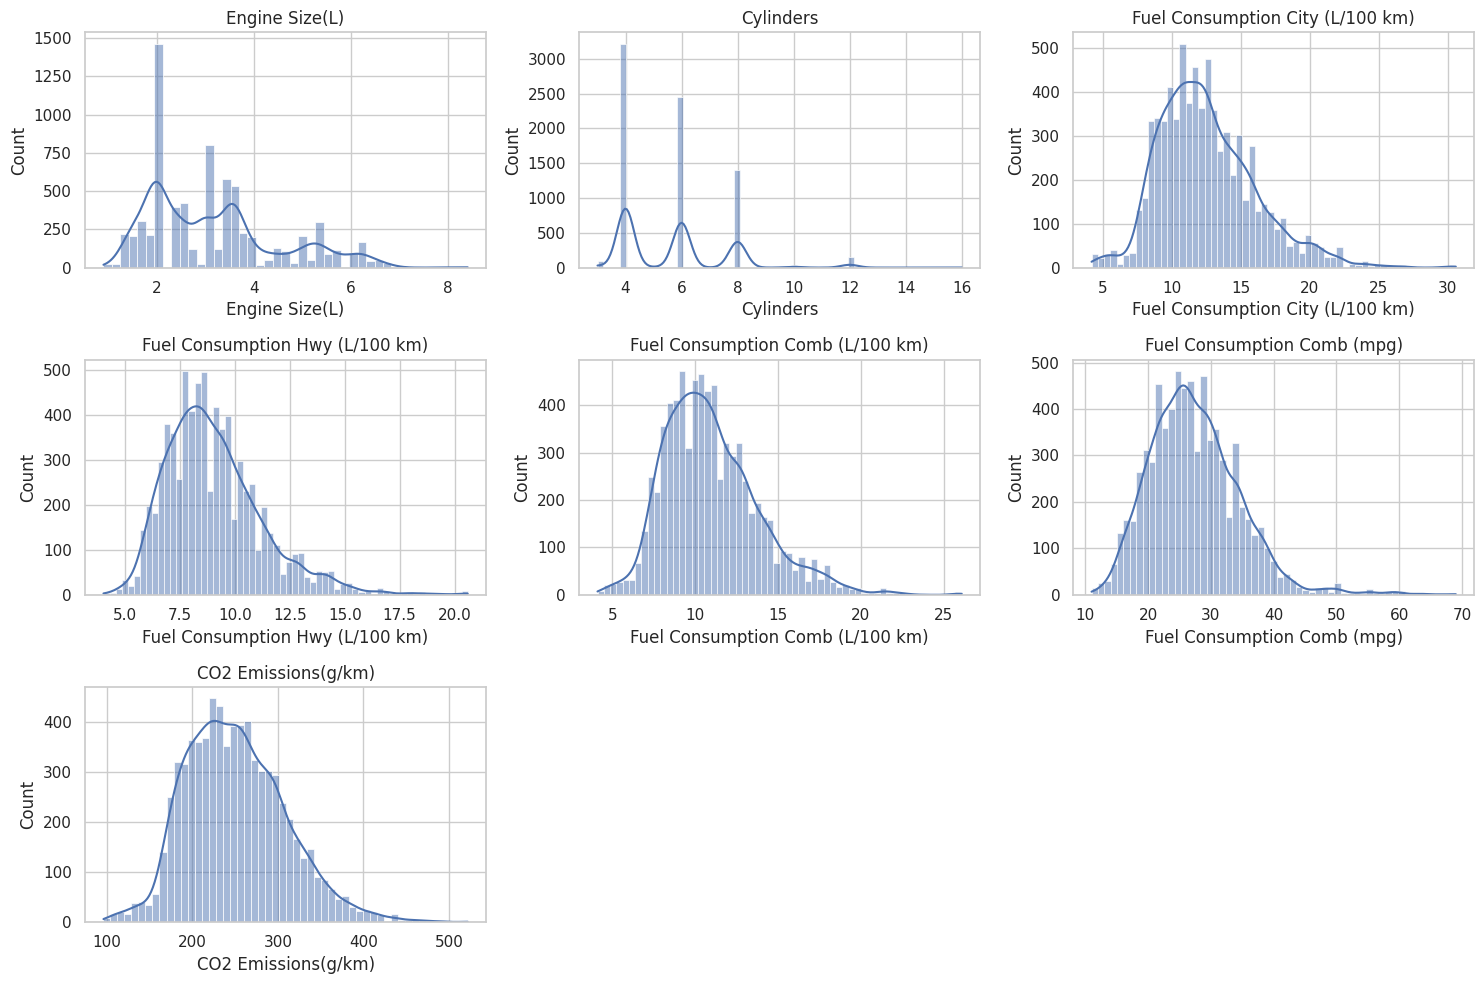

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

# Summary statistics for the numerical columns
summary_statistics = data.describe()

# Creating histograms for each numerical feature
num_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
            'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

summary_statistics


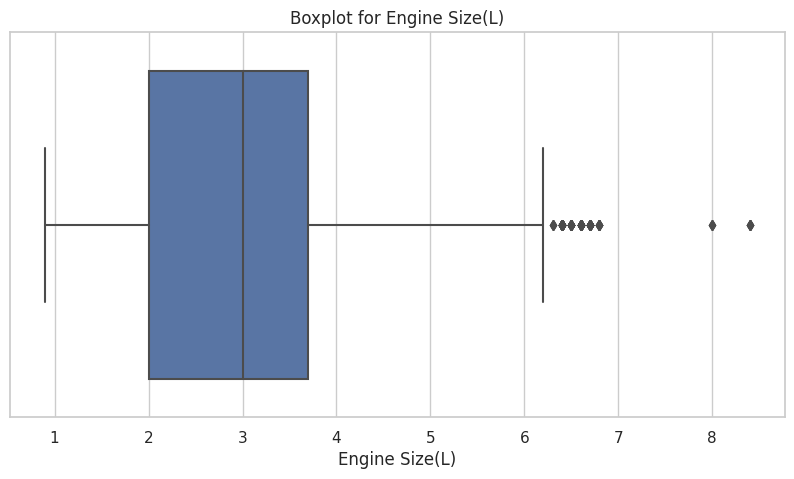

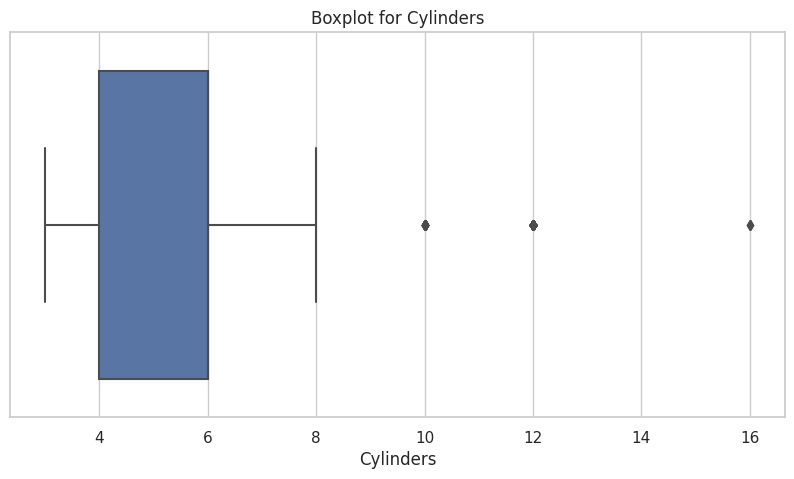

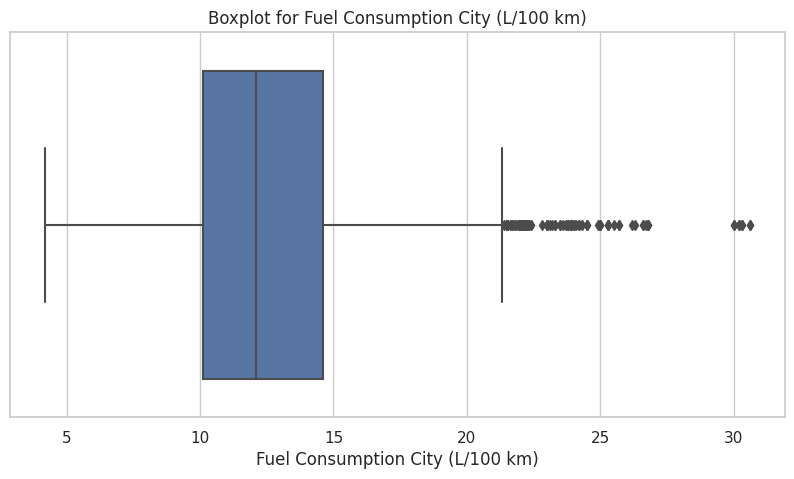

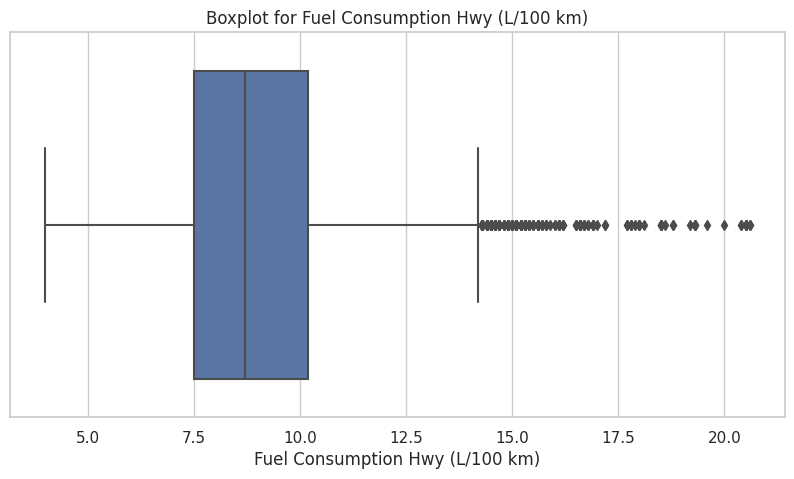

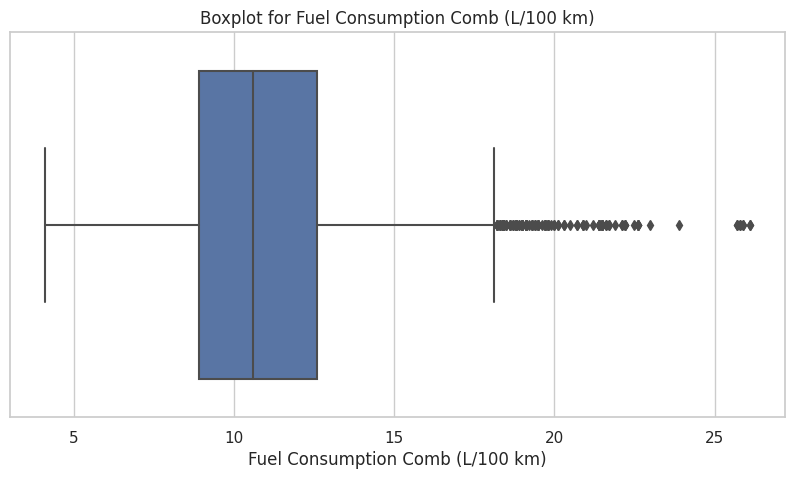

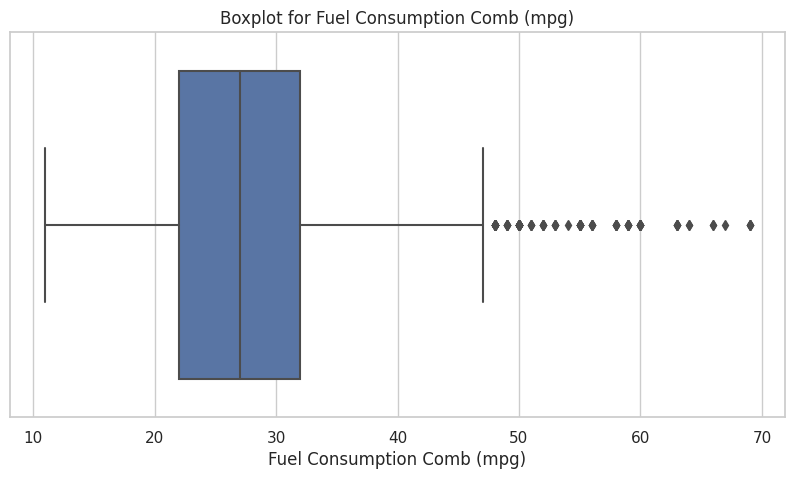

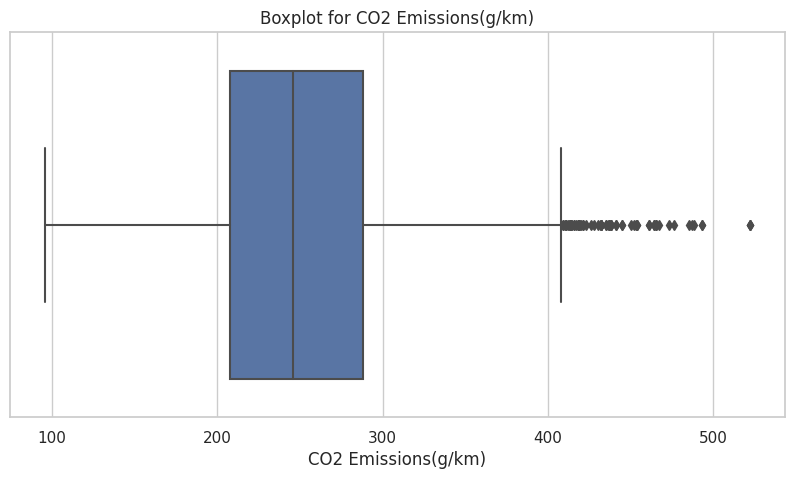

In [ ]:
# Cek data outlier
num_feat = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
            'Fuel Consumption Hwy (L/100 km)',
            'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)',
            'CO2 Emissions(g/km)']
cat_feat = ['Transmission', 'Fuel Type']

for num in num_feat:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x=num, palette='deep')
    plt.title("Boxplot for {}".format(num))
    plt.show()

      Jumlah sample  Persentase
AS6            1324        17.9
AS8            1211        16.4
M6              901        12.2
A6              789        10.7
A8              490         6.6
AM7             445         6.0
A9              339         4.6
AS7             319         4.3
AV              295         4.0
M5              193         2.6
AS10            168         2.3
AM6             132         1.8
AV7             118         1.6
AV6             113         1.5
M7               91         1.2
A5               84         1.1
AS9              77         1.0
A4               65         0.9
AM8              62         0.8
A7               53         0.7
AV8              39         0.5
A10              31         0.4
AS5              26         0.4
AV10             11         0.1
AM5               4         0.1
AM9               3         0.0
AS4               2         0.0


<Axes: xlabel='Transmission', ylabel='count'>

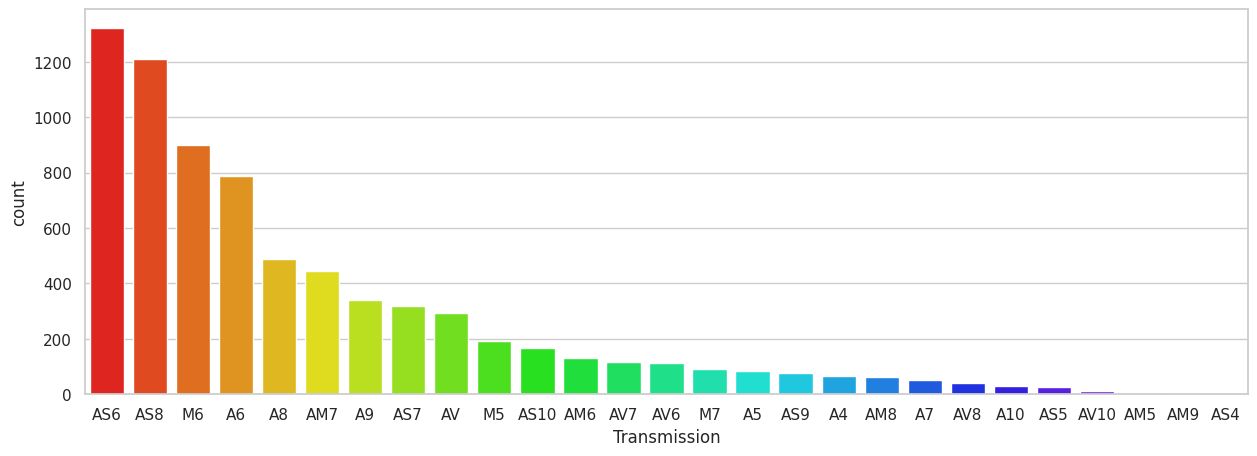

In [ ]:
feature = cat_feat[0]
count = data[feature].value_counts()

#Categorical
percent = 100 * data[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)

plt.figure(figsize = (15,5))
sns.countplot(x = feature, data = data, palette = 'gist_rainbow',
              order = data['Transmission'].value_counts().index)

Dapat dilihat bahwa dalam dataset ini, tipe transmisi kendaraan yang paling banyak adalah AS6 (otomatis dengan shift + 6 gigi/gears). Kemudian ada AS8 (otomatis dengan shift + 8 gigi/gears) di urutan kedua dan M6 (manual + 6 gigi/gears) di urutan ketiga. Tipe transmisi yang paling sedikit adalah AS4 (otomatis dengan shift + 4 gigi/gears).

Jika mengabaikan jumlah gigi (gears) maka persentase frekuensi tipe transmisi dari yang terbanyak adalah AS (otomatis dengan pilihan shift) sebanyak 42.3%, A (otomatis) sebanyak 24.6 %, M (manual) sebanyak 16.0%, AM (manual Otomatis) sebanyak 8.7%, AV (variabel kontinu) sebanyak 7.8%.

   Jumlah sample  Persentase
X           3637        49.2
Z           3202        43.4
E            370         5.0
D            175         2.4
N              1         0.0


<Axes: xlabel='Fuel Type', ylabel='count'>

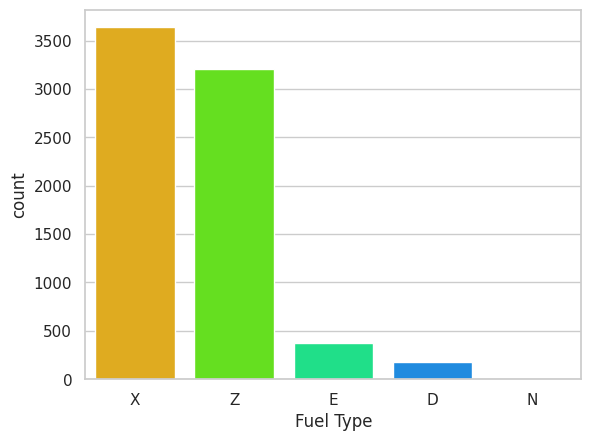

In [ ]:
feature = cat_feat[1]
count = data[feature].value_counts()

percent = 100 * data[feature].value_counts(normalize = True)
df = pd.DataFrame({'Jumlah sample' : count, 'Persentase' : percent.round(1)})
print(df)
sns.countplot(x = feature, data = data, palette = 'gist_rainbow',
              order = data['Fuel Type'].value_counts().index)

Dapat dilihat bahwa persentase frekuensi tipe bahan bakar dari yang terbanyak adalah X (Bensin Reguler) sebanyak 49.2 %, Z (Bensin Premium) sebanyak 43.4 %, E (Ethanol E85) sebanyak 5 %,  D (Disel) sebanyak 2.4 %, dan terakhir N (Gas Natural) sebanyak 0.01 %.

<ipython-input-38-85c40f11568c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x=col, y='CO2 Emissions(g/km)', kind='bar', dodge=False, height=4,


<Figure size 1500x600 with 0 Axes>

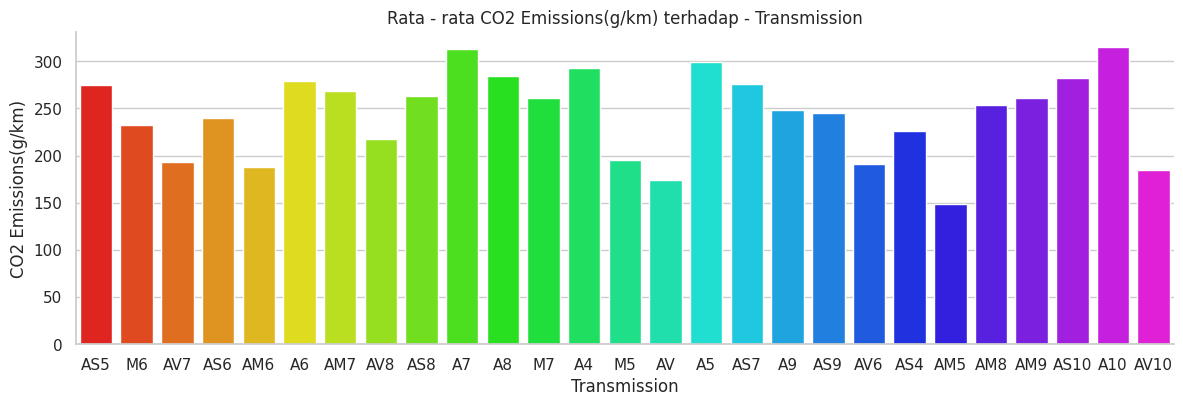

<ipython-input-38-85c40f11568c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(x=col, y='CO2 Emissions(g/km)', kind='bar', dodge=False, height=4,


<Figure size 1500x600 with 0 Axes>

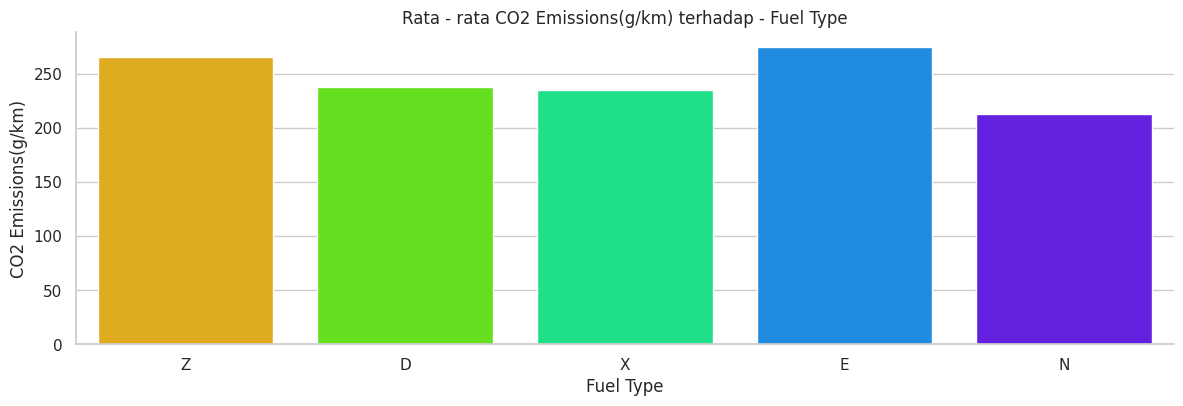

In [ ]:
#Categorical
categorical = data.select_dtypes(include='object').columns.tolist()

for col in cat_feat:
    plt.figure(figsize=(15, 6))
    sns.catplot(x=col, y='CO2 Emissions(g/km)', kind='bar', dodge=False, height=4,
                aspect=3, data=data, palette='gist_rainbow', ci=None)
    plt.title("Rata - rata CO2 Emissions(g/km) terhadap - {}".format(col))
    plt.show()

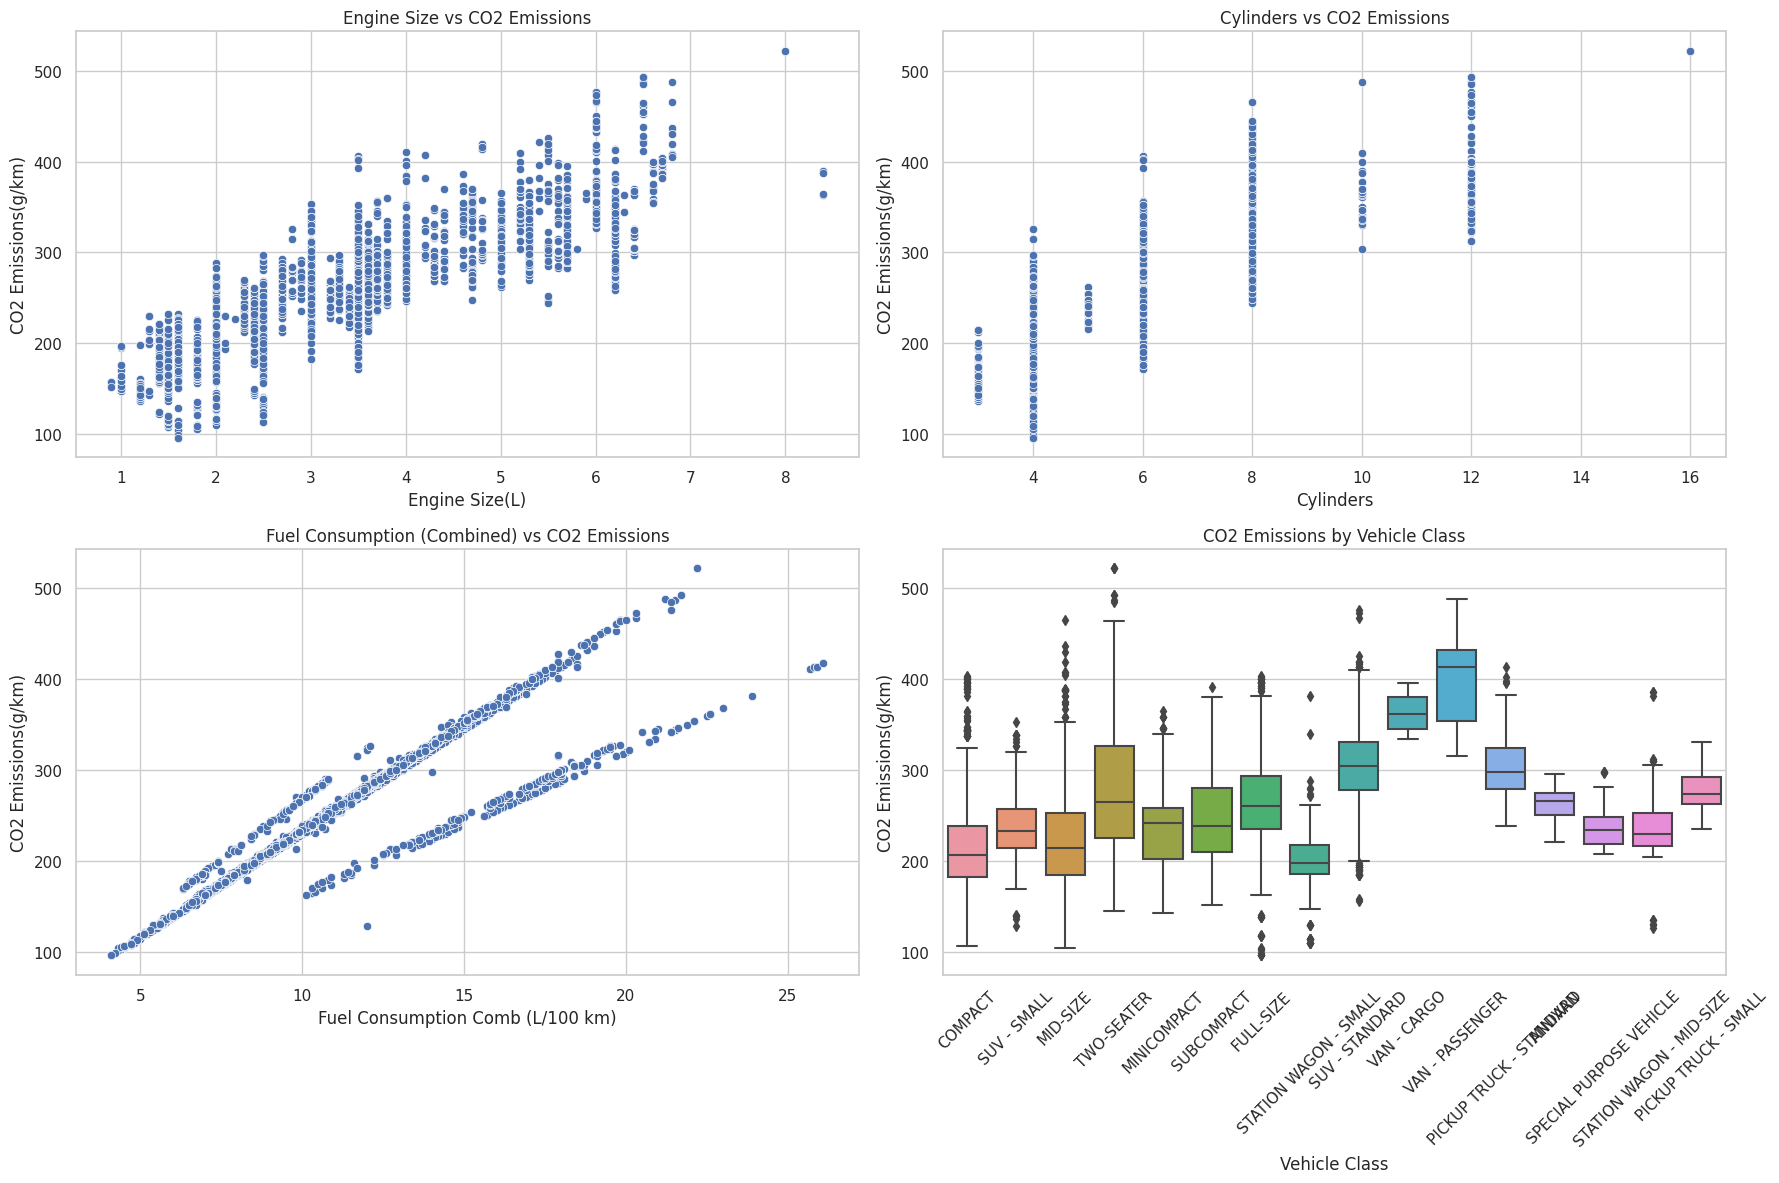

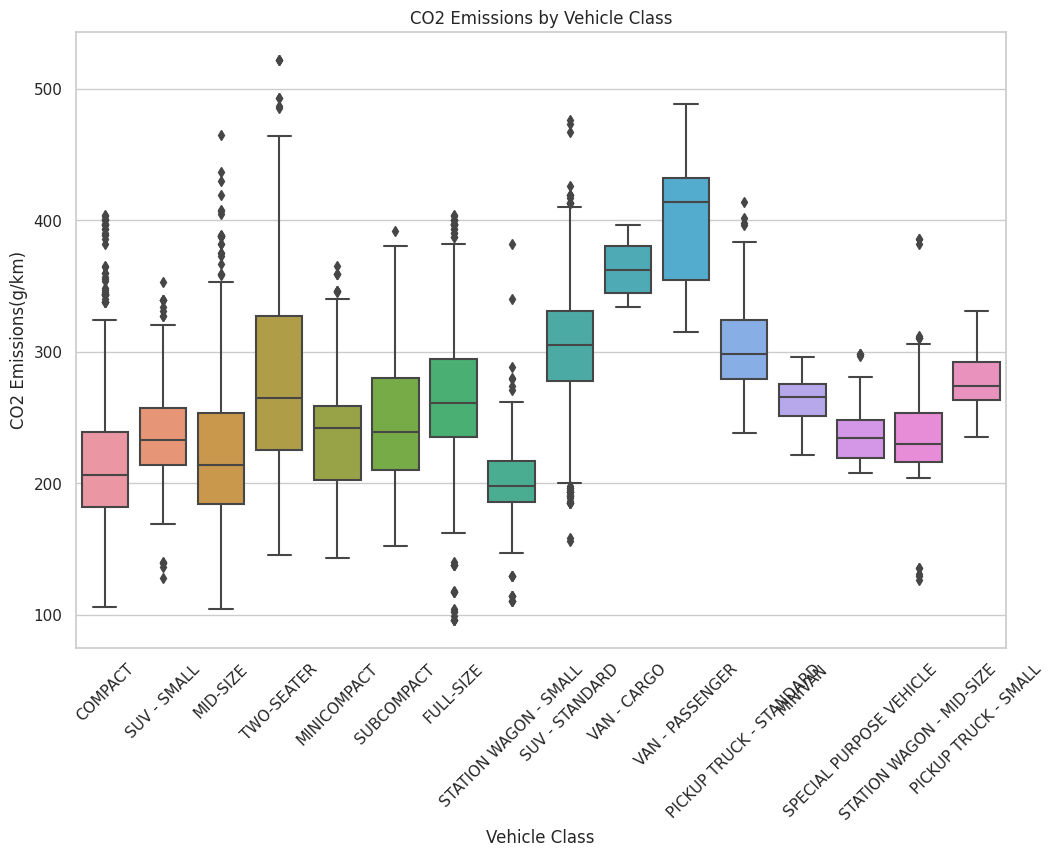

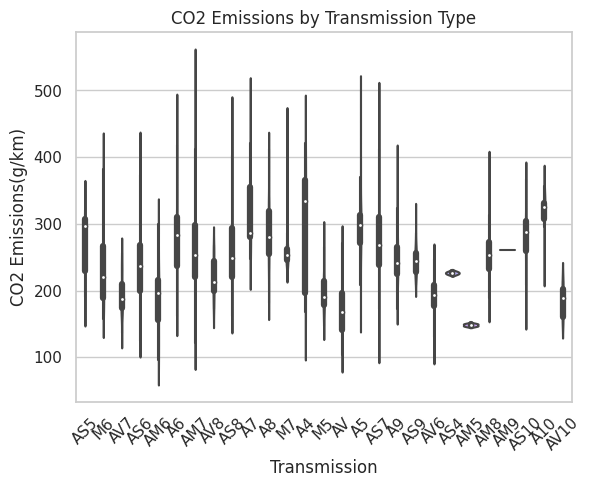

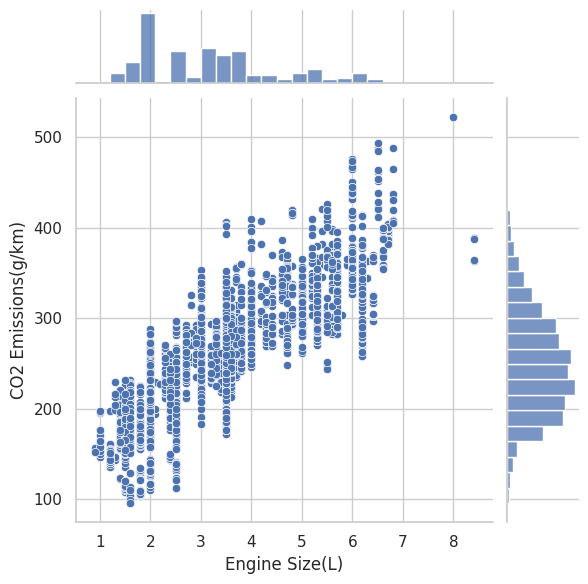

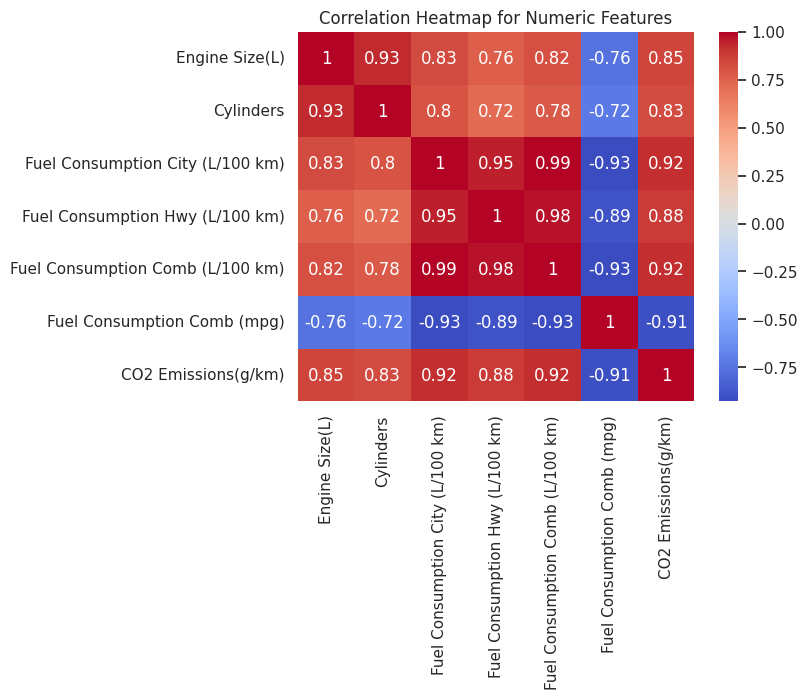

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.927653,0.831379,0.761526,0.817060,-0.757854,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,-0.719321,0.832644
Fuel Consumption City (L/100 km),0.831379,0.800702,1.000000,0.948180,0.993810,-0.927059,0.919592
Fuel Consumption Hwy (L/100 km),0.761526,0.715252,0.948180,1.000000,0.977299,-0.890638,0.883536
Fuel Consumption Comb (L/100 km),0.817060,0.780534,0.993810,0.977299,1.000000,-0.925576,0.918052
Fuel Consumption Comb (mpg),-0.757854,-0.719321,-0.927059,-0.890638,-0.925576,1.000000,-0.907426
CO2 Emissions(g/km),0.851145,0.832644,0.919592,0.883536,0.918052,-0.907426,1.000000


In [ ]:
# Analyzing the relationship between various features and CO2 emissions
# Scatter plots for Engine Size, Cylinders, and Fuel Consumption vs CO2 Emissions

plt.figure(figsize=(18, 12))

# Engine Size vs CO2 Emissions
plt.subplot(2, 2, 1)
sns.scatterplot(x=data['Engine Size(L)'], y=data['CO2 Emissions(g/km)'])
plt.title('Engine Size vs CO2 Emissions')

# Cylinders vs CO2 Emissions
plt.subplot(2, 2, 2)
sns.scatterplot(x=data['Cylinders'], y=data['CO2 Emissions(g/km)'])
plt.title('Cylinders vs CO2 Emissions')

# Fuel Consumption (Combined) vs CO2 Emissions
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['Fuel Consumption Comb (L/100 km)'],
                y=data['CO2 Emissions(g/km)'])
plt.title('Fuel Consumption (Combined) vs CO2 Emissions')

# Grouped analysis by Vehicle Class
plt.subplot(2, 2, 4)
sns.boxplot(x=data['Vehicle Class'], y=data['CO2 Emissions(g/km)'])
plt.title('CO2 Emissions by Vehicle Class')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Boxplot for Vehicle Class vs CO2 Emissions
plt.figure(figsize=(12, 8))
sns.boxplot(x='Vehicle Class', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class')
plt.show()

# Violin Plot for Transmission Type vs CO2 Emissions
sns.violinplot(x='Transmission', y='CO2 Emissions(g/km)', data=data)
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Transmission Type')
plt.show()

# Scatter Plot with Marginal Histograms
sns.jointplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', kind='scatter',
              data=data, marginal_kws=dict(bins=25, fill=True))
plt.show()

# Correlation matrix for numerical features
# Exclude non-numeric columns for correlation analysis
numeric_df = data.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

# Display the correlation matrix
correlation



###Deskripsi untuk output di atas:

**1. Scatter Plot**

- Engine Size vs CO2 Emissions : menunjukkan distribusi co2 emission yang dihasilkan oleh berbagai ukuran mesin (engine size). Dapat terlihat bahwa semakin besar ukuran mesin (engine size), semakin tinggi co2 emission yang dihasilkan.
- Cylinders vs CO2 Emissions : menunjukkan distribusi co2 emission yang dihasilkan oleh berbagai jumlah silinder (cylinders) kendaraan. Dapat terlihat bahwa semakin banyak jumlah silinder (cylinders) kendaraan, semakin tinggi co2 emission yang dihasilkan.
- Fuel Consumption (Combined) vs CO2 Emissions :  menunjukkan distribusi co2 emission yang dihasilkan oleh berbagai jumlah konsumsi bahan bakar gabungan dalam satuan (L/100 km). Dapat terlihat bahwa semakin banyak jumlah konsumsi bahan bakar gabungan (L/100 km), semakin tinggi co2 emission yang dihasilkan.

**2. Box Plot**
- Box plot CO2 Emissions by Vehicle Class menunjukkan bahwa distribusi emisi CO2 bervariasi untuk setiap kelas kendaraan. Selain itu, dapat dilihat bahwa kelas kendaraan Van - Passenger memproduksi emisi CO2 paling besar.

Jika box plot untuk kelas kendaraan tertentu menunjukkan median yang tinggi dan whiskers yang panjang ke atas, itu bisa menunjukkan bahwa sebagian besar data memiliki emisi CO2 yang tinggi.

**3. Violin Plot**
- Violin plot CO2 Emissions by Transmission Type menunjukkan bahwa distribusi emisi CO2 bervariasi pada setiap jenis transmisi.

**4. Joint Plot (Scatter Plot with Marginal Histograms)**
- Engine Size vs CO2 Emissions (Scatter Plot with Marginal Histograms) : Scatter plot menunjukkan pola yang cenderung naik dari kiri bawah ke kanan atas. Hal ini memberikan informasi bahwa terdapat hubungan positif antara Engine Size dan CO2 Emissions. Lalu, histogram di sumbu x dapat memberikan informasi tentang sebaran ukuran mesin (Engine Size) dalam dataset, sementara histogram di sumbu y memberikan informasi tentang sebaran emisi CO2 (CO2 Emissions).

**5. Correlation Heatmap**
- Berdasarkan Correlation Heatmap for Numeric Features dapat diketahui bahwa semua numeric features kecuali feature Fuel Consumption Comb (mpg) memiliki hubungan positif dengan emisi CO2. Numeric features yang memiliki korelasi paling besar dengan emisi CO2 adalah Fuel Consumption City (L/100 km) dan Fuel Consumption Comb (L/100 km) yaitu dengan nilai korelasi .92.



In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encoding for categorical variables
encoder = OneHotEncoder(sparse=False)
categorical_cols = ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type']
encoded_data = encoder.fit_transform(data[categorical_cols])

# Creating a DataFrame for the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Standard scaling for numerical features
scaler = StandardScaler()
numerical_cols = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                  'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                  'Fuel Consumption Comb (mpg)']
scaled_data = scaler.fit_transform(data[numerical_cols])

# Creating a DataFrame for the scaled numerical data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Combining the scaled and encoded data
preprocessed_data = pd.concat([scaled_df, encoded_df], axis=1)

# Displaying the first few rows of the preprocessed data
preprocessed_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),Make_ACURA,Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_D,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,-0.856721,-0.883408,-0.759002,-1.052781,-0.855742,0.763110,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.561317,-0.883408,-0.387577,-0.603202,-0.475423,0.209966,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-1.225976,-0.883408,-1.873275,-1.457401,-1.754677,2.837400,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.251043,0.210575,0.040990,0.026208,0.043193,-0.343178,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.251043,0.210575,-0.130437,-0.153624,-0.129679,-0.066606,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Splitting the data into features and target variable
X = preprocessed_data
y = data['CO2 Emissions(g/km)']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the models
linear_model = LinearRegression()
random_forest_model = RandomForestRegressor(random_state=42)
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Additional model - Support Vector Regressor (SVR)
from sklearn.svm import SVR
svr_model = SVR()

# Training the models
linear_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Making predictions on the test set
linear_predictions = linear_model.predict(X_test)
rf_predictions = random_forest_model.predict(X_test)
gb_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluating the models
linear_mse = mean_squared_error(y_test, linear_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

linear_r2 = r2_score(y_test, linear_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
svr_r2 = r2_score(y_test, svr_predictions)

# Results
model_performance = {
    "Linear Regression": {"MSE": linear_mse, "R2": linear_r2},
    "Random Forest": {"MSE": rf_mse, "R2": rf_r2},
    "Gradient Boosting": {"MSE": gb_mse, "R2": gb_r2},
    "SVR": {"MSE": svr_mse, "R2": svr_r2}
}

model_performance



{'Linear Regression': {'MSE': 7.762298033436446e+23,
  'R2': -2.2567264118893104e+20},
 'Random Forest': {'MSE': 12.059574896238903, 'R2': 0.9964939298816834},
 'Gradient Boosting': {'MSE': 15.448554697965296, 'R2': 0.9955086546197737},
 'SVR': {'MSE': 306.93533340582485, 'R2': 0.9107649473576931}}

Berdasarkan evaluasi model dengan Mean Squared Error (MSE) dan R-squared (R2) di atas, dapat diketahui:

**1. Linear Regression**
- MSE: Nilai MSE yang tinggi (7.762298033436446e+23) menunjukkan bahwa model Linear Regression tidak dapat memberikan prediksi yang baik, dan memiliki error model sangat besar.
- R2: Nilai R2 yang sangat rendah (-2.2567264118893104e+20) dan bernilai negatif menunjukkan bahwa model tidak bekerja lebih baik daripada model yang hanya memprediksi nilai rata-rata target.

**2. Random Forest**
- MSE: Nilai MSE yang rendah (12.059574896238903) menunjukkan bahwa model Random Forest memberikan prediksi yang baik dan mendekati nilai aktual.
- R2: Nilai R2 yang tinggi (0.9964939298816834) dan mendekati angka 1 menunjukkan bahwa sebagian besar variasi dalam data target dapat dijelaskan oleh model.

**3. Gradient Boosting**
- MSE: Nilai MSE (15.448554697965296) yang rendah menunjukkan bahwa model Gradient Boosting memberikan prediksi yang baik dan mendekati nilai aktual.
- R2: Nilai R2 yang tinggi (0.9955086546197737) dan mendekati 1 menunjukkan bahwa sebagian besar variasi dalam data target dapat dijelaskan oleh model.

**4. SVR (Support Vector Regression)**
- MSE: SVR memperoleh nilai MSE yang cukup tinggi (306.93533340582485) meski tergolong lebih rendah jika dibandingkan dengan Linear Regression. Namun, nilai ini masih cukup tinggi.
- R2: Nilai R2 (0.9107649473576931) yang tinggi menunjukkan bahwa model SVR mampu menjelaskan variasi dalam data target dengan baik, tetapi performanya tidak sebaik Random Forest atau Gradient Boosting.

**Kesimpulan Analisis**
* Model Random Forest dan Gradient Boosting memiliki performa yang baik dengan MSE rendah dan R2 tinggi, menunjukkan bahwa keduanya cocok dengan data dan memberikan prediksi yang akurat.
* Model Linear Regression memiliki kinerja yang sangat buruk, menunjukkan bahwa model tersebut tidak dapat menangkap pola dalam data dengan baik.
* Model SVR memiliki R2 yang tinggi, tetapi juga memiliki nilai MSE yang cukup tinggi.

### - Investigate Linear Regression

#### 1) Data Preprocessing and Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Selection
selector = SelectKBest(f_regression, k=100)  # Select top 100 features
X_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

# Train Linear Regression with selected features
linear_model.fit(X_new, y_train)

# Evaluate the model
linear_predictions = linear_model.predict(X_test_new)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)


In [ ]:
# Results
model_performance = {
    "Linear Regression": {"MSE": linear_mse, "R2": linear_r2}
}

model_performance

{'Linear Regression': {'MSE': 31.867818386408295, 'R2': 0.99073509582702}}

#### 2) Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Inspect VIF values
print(vif_data.sort_values(by="VIF"))


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


LinAlgError: ignored

#### 3) Outliers

In [ ]:
# Identifying outliers using IQR
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
X_train_filtered = X_train[~((X_train < (Q1 - 1.5 * IQR)) |(X_train > (Q3 + 1.5 * IQR))).any(axis=1)]
y_train_filtered = y_train[X_train_filtered.index]

# Train the model with filtered data
linear_model.fit(X_train_filtered, y_train_filtered)

# Evaluate the model
linear_predictions = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)


#### 4) Numerical Stability

In [ ]:
# Log transformation (example)
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

# Train the model with transformed data
linear_model.fit(X_train_log, y_train)

# Evaluate the model
linear_predictions = linear_model.predict(X_test_log)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)


#### 5) Simplifying the Model

In [ ]:
from sklearn.linear_model import Ridge

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Evaluate the model
ridge_predictions = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)


In [ ]:
# Results
model_performance = {
    "Ridge Regression": {"MSE": ridge_mse, "R2": ridge_r2}
}

model_performance

#### 6) Model Diagnostics

In [ ]:
import matplotlib.pyplot as plt

# Plotting residuals
residuals = y_test - linear_predictions
plt.scatter(linear_predictions, residuals)
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


### - Model Optimization

#### 1) Random Forest Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search for the Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Grid Search model
grid_search_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                              param_grid=param_grid_rf,
                              cv=3,
                              n_jobs=-1,
                              verbose=2)

# Fit the grid search to the data
grid_search_rf.fit(X_train, y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
# For Random Forest
print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)


### - Feature Importance Analysis

In [ ]:
# Assuming you have a DataFrame 'X' with feature names:
feature_importances_rf = pd.Series(random_forest_model.feature_importances_, index=X.columns)
feature_importances_gb = pd.Series(gradient_boosting_model.feature_importances_, index=X.columns)

# Sort and plot the feature importance for visualization
feature_importances_rf_sorted = feature_importances_rf.sort_values(ascending=False)
feature_importances_gb_sorted = feature_importances_gb.sort_values(ascending=False)

feature_importances_rf_sorted[:10].plot(kind='bar', title='Top 10 Feature Importances for Random Forest')
plt.show()

feature_importances_gb_sorted[:10].plot(kind='bar', title='Top 10 Feature Importances for Gradient Boosting')
plt.show()


### - Model Interpretation and Visualization

### - Model Validation

### Visualization

#### 1) Actual vs. Predicted Values Plot

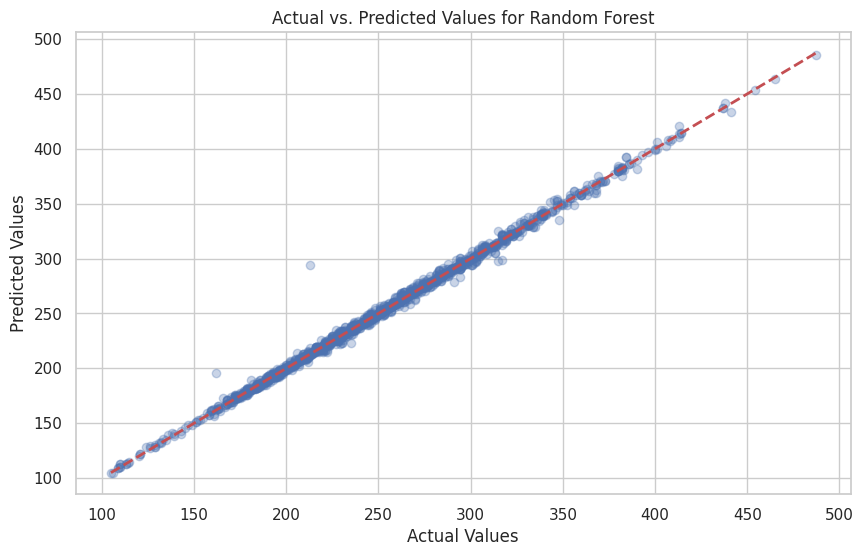

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have the test set true values 'y_test' and predictions 'rf_predictions' from Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Random Forest')
plt.show()


#### 2) Feature Importance Plot for Random Forest

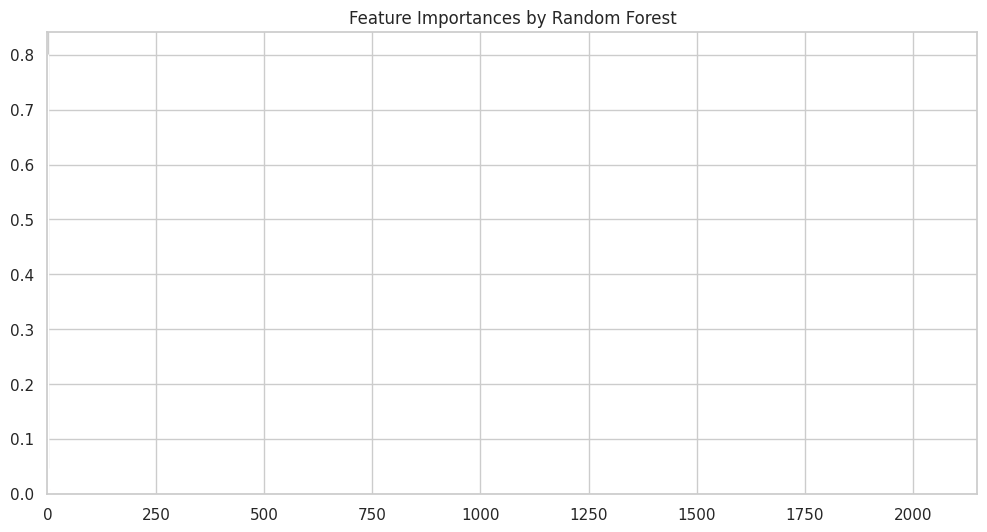

In [ ]:
# Assuming 'final_rf_model' is the trained Random Forest model
importances = random_forest_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title('Feature Importances by Random Forest')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()


#### 3) Residuals Plot

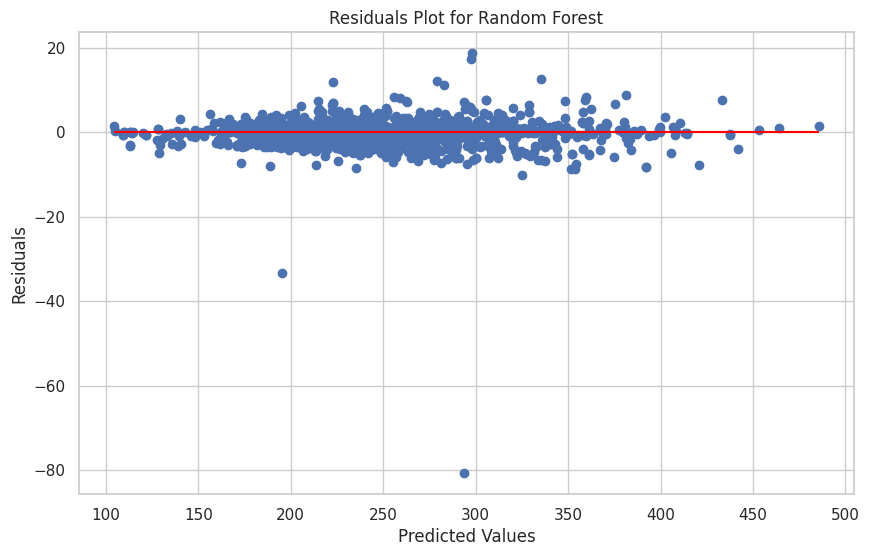

In [ ]:
residuals = y_test - rf_predictions
plt.figure(figsize=(10, 6))
plt.scatter(rf_predictions, residuals)
plt.hlines(y=0, xmin=rf_predictions.min(), xmax=rf_predictions.max(), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot for Random Forest')
plt.show()


#### 4) Learning Curve

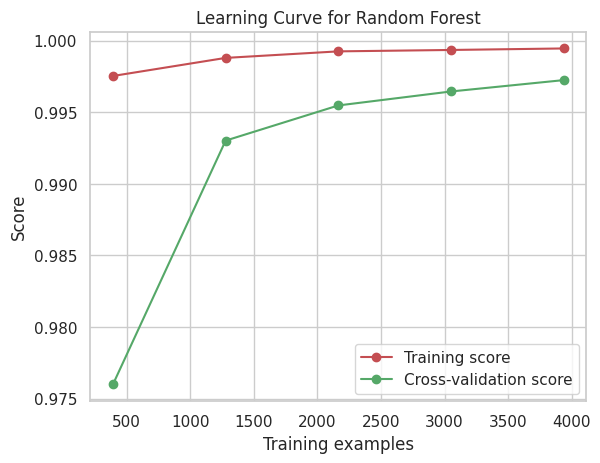

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X_train, y_train, n_jobs=-1, cv=3,
                                                        train_sizes=np.linspace(.1, 1.0, 5), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title('Learning Curve for Random Forest')
plt.legend(loc="best")
plt.show()


Berdasarkan Learning Curve for Random Forest di atas dapat diketahui bahwa:

**1. Skor Pelatihan (Garis Merah)**

Garis ini merepresentasikan kinerja model pada data pelatihan. Seiring dengan penambahan jumlah sampel pelatihan, kemampuan model untuk menyesuaikan data akan meningkat atau tetap konstan. Pada Learning Curve for Random Forest di atas, skor pelatihan dimulai tinggi dan tetap relatif datar. Hal ini menunjukkan bahwa model Random Forest sesuai dengan baik pada data pelatihan di berbagai ukuran set pelatihan.

**2. Skor Validasi Silang (Garis Hijau)**

Garis ini merepresentasikan kinerja model pada set validasi terpisah yang tidak dilihat selama pelatihan. Pada Learning Curve for Random Forest di atas, skor validasi silang meningkat dengan cepat seiring penambahan lebih banyak sampel pelatihan, yang kemudian bergerak secara kontan mendatar. Hal ini menunjukkan bahwa model semakin baik dalam menggeneralisasi saat belajar dari lebih banyak data.

**3. Jumlah Sampel Pelatihan**

Sumbu x menunjukkan jumlah sampel pelatihan yang digunakan untuk melatih model. Seiring garis bergerak ke kanan sepanjang sumbu, maka lebih banyak data yang digunakan untuk melatih model.

**4. Skor**

Sumbu y mewakili skor, biasanya akurasi atau metrik kinerja lainnya seperti R² atau skor F1. Skor menunjukkan seberapa baik kinerja model; nilai yang lebih tinggi lebih baik.

---
**Temuan:**

**Generalisasi yang Baik**

Skor validasi silang meningkat hampir bertemu dengan skor pelatihan menunjukkan bahwa model menggeneralisasi dengan baik dan tidak overfitting. Overfitting akan ditunjukkan jika skor pelatihan tinggi tetapi skor validasi silang tetap rendah, menunjukkan adanya kesenjangan yang signifikan antara kedua garis tersebut.

**Data Cukup**

Datarnya kedua garis menunjukkan bahwa menambahkan lebih banyak sampel pelatihan mungkin tidak akan meningkatkan kinerja model secara signifikan. Model kemungkinan telah belajar sebanyak mungkin tentang data dan data tambahan akan menghasilkan pengembalian yang semakin berkurang.

**Kinerja Tinggi**

Skor-skornya cukup tinggi, yang menunjukkan bahwa model Random Forest berkinerja baik pada tugas ini.

## **Insight - Kesimpulan - Saran/Rekomendasi**

**Insight**
1. Semakin besar ukuran mesin (engine size), semakin banyak jumlah silinder dan konsumsi bahan bakar dari suatu kendaraan, maka dapat menghasilkan gas CO2 yang banyak juga. Insight ini dapat menjadi pertimbangan bagi produsen kendaraan untuk  memproduksi kendaraan yang lebih ramah terhadap lingkungan. Selain itu, bagi konsumen yang concern terhadap isu lingkungan, insight ini dapat dijadikan pertimbangan dalam memilih kendaraan dengan kombinasi fitur tertentu yang menghasilkan lebih sedikit gas CO2.
2. Hasil evaluasi model menunjukkan bahwa Linear Regression adalah model dengan performa paling buruk dari keempat model lain yang digunakan dalam project ini karena R2 Score-nya bernilai negatif (-3.59%).
3. Setelah dilakukan investigasi dan optimalisasi terhadap performa Linear Regression R2 Score-nya mengalami peningkatan secara drastis.
  * Melalui Data Preprocessing and Feature Selection diperoleh R2 Score sebesar 99.07%.
  * Melalui Simplifying the Model (Ridge Regression) diperoleh R2 Score sebesar 99.27%.
4. Hasil Hyperparameter Tuning terhadap Random Forest (model dengan R2 Score paling tinggi yaitu 99.65%) diperoleh R2 Score terbaik dari Random Forest adalah 99.73%.
5. Analisis feature importance untuk Random Forest dan Gradient Boosting (dua model dengan perolehan R2 Score tertinggi) menunjukkan bahwa feature Fuel Consumption Comb (L/100 km) merupakan feature dengan kontribusi paling tinggi yaitu mencapai 80%.
Dominasi feature Fuel Consumption Comb (L/100 km) untuk kedua model tersebut bisa jadi merupakan penyebab mengapa R2 Score yang dihasilkan tinggi (overfitting).
6. Perolehan R2 Score Random Forest sebesar 99.65% dapat dijelaskan oleh Learning Curve yang menunjukkan adanya progres dari Skor Pelatihan dan Skor Validasi Silang seiring bertambahnya jumlah Training Example. Dengan jumlah Training Example sebanyak 500 saja, Skor Pelatihan bahkan berada pada kisaran angka 99.6% dan Skor Validasi Silang berada pada kisaran angka 97.5%.

**Kesimpulan**

Berdasarkan perolehan R2 Score keempat model (Linear Regression yang telah melalui optimalisasi, Random Forest, Gradient Boosting, SVR) yang berada pada angka 90% ke atas menunjukkan bahwa model-model tersebut dapat memprediksi bahwa kombinasi fitur-fitur tertentu pada kendaraan dapat menghasilkan kadar emisi CO2 yang tinggi.

**Saran/Rekomendasi**

Meskipun Learning Curve menunjukkan progres, tetapi patut mempertimbangkan kemungkinan adanya overfitting, underfitting, outliers, serta konfigurasi model. Dengan demikian, pada tahap optimalisasi mungkin bisa melakukan investigasi terkait hal-hal tersebut.